# STA 141B Final Project: 
## Investigating Cryptocurrency Through Data Analysis
### By Rick Alarcon and Adam Atamian
![title](cryptowordcloud.png)

## What is Cryptocurrency? 
#### - It is more than just Bitcoin!
#### - Cryptocurreny (crypto or coins for short) is a digital asset designed to work as a medium of exchange that uses cryptography to secure its transactions, to control the creation of additional units, and to verify the transfer of assets. Cryptos are treated like investments and are traded on exchanges into fiat currency or for other cryptos.

### Buzzwords Rundown:
##### - Blockchain: a continuously growing list of records, called blocks, which are linked and secured using cryptography. Each block typically contains a cryptographic hash of the previous block, a timestamp and transaction data.
##### - Decentralization: simply put there are multiple points that do the work, most cryptos follow this ideology.
##### - Mining: a validation of transactions usually through specialized machines with the reward being new cryptocurrency (this is what has caused GPU prices to dramatically increase).
##### - Alt Coins: most cryptos are alternative coins, and as of January 2018, there were over 1384 and growing digital currencies in existence. Some perform better than the Bitcoin due to new technological developments, but Bitcoin still reigns on top due to its popularity. 

### Why Analyze Cryptocurrency?
#### - General curiosity towards a digital frontier that combines finance, currency, cryptography, and technology.
#### - Currently holding various cryptocurrencies.
#### - Want to get a better picture of how cryptocurrencies fluctuate and are viewed by the public.

## Questions We Are Analyzing:
##### - Are alternative coins tied to Bitcoin movements?
##### - Are Bitcoin trends related to the stock market or U.S. Dollar?
##### - Which top cryptocurrencies have been the biggest gainers?
##### - What cryptocurrencies are talked about the most?
##### - What topics are cryptocurrency communities discussing during periods of growth or decline?

## Where Does The Data Come From?

#### CryptoCompare.com API
- The API compiles various cryptocurrency data including live prices, trades, volumes, etc.

#### Yahoo Finance
- Data from the S&P 500 stock market compiled into a CSV file.

#### Reddit.com, Python Reddit API Wrapper (PRAW)
- In February 2016 Reddit had 36 million user accounts, 231 million unique monthly visits, and 11,464 active communities. [Source](https://expandedramblings.com/index.php/reddit-stats/)
- A study showed that 80% of Reddit users get their news from the site. 
[Source](http://www.journalism.org/2016/02/25/seven-in-ten-reddit-users-get-news-on-the-site/)
- The Cryptocurrency subreddit has more than 630,000 subscribers.

### This project is divided into three parts:
## - Part I: Exploring Cryptocurrency Numerical Data
## - Part II: Exploring Cryptocurrency Social Data
## - Part III: Summary and Conclusion

# - Part I:
## Exploring Cryptocurrency Numerical Data
#### Objectives:
- ** Research the top cryptocurrencies: Bitcoin, Ethereum, Litecoin and Ripple**
- ** Analyze the daily price performance for each cryptocurrency **
- ** Compare their price performance and finding similar price patterns **
- ** Apply statistical analysis and creating mathematical model **
- ** Explore the correlation between the Stock market and Bitcoin prices **
- ** Visualizing the US dollars price with respect to the bitcoin prices **

Note: 

- Cryptocompare API only allows 6000 request per hour per IP to get the historial data.

- Data range from March 11,2017 to March 11,2018

In [2]:
import requests
import requests_cache
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
plt.style.use('ggplot')
%matplotlib inline
requests_cache.install_cache('crypto_cache')

## Comparing the top cryptocurrencies: Bitcoin, Ethereum, Litecoin, Ripple
### This is determined by a cryptocurrency's market capitalization which is one way to rank the relative size of a cryptocurrency. It's calculated by multiplying the Price by the Circulating Supply.  
#### Of these four Bitcoin has the largest market capitalization and Ripple has the smallest.

#### Bitcoin Daily Price Chart

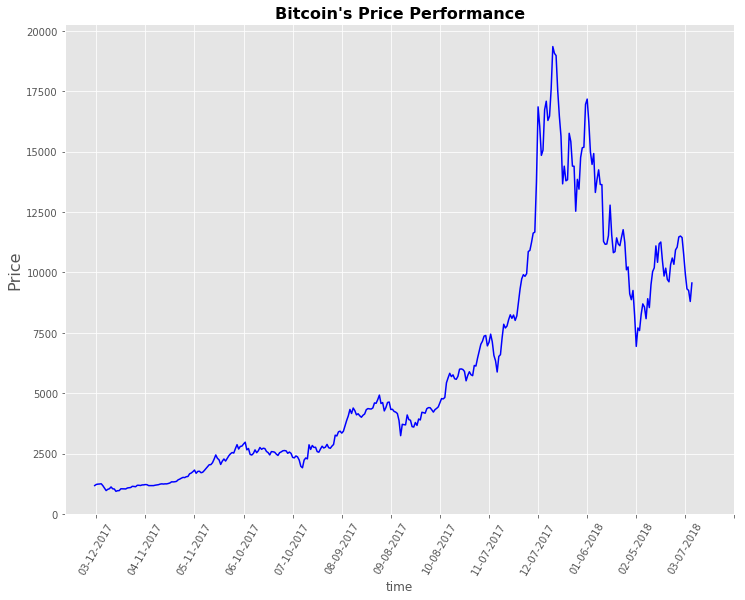

In [3]:
bitcoin_365days= """https://min-api.cryptocompare.com/data/histoday?fsym=BTC&tsym=USD&limit=365"""
bitcoin_365days= requests.get(bitcoin_365days)
bitcoin_365days= bitcoin_365days.json()
bitcoin_365days=bitcoin_365days['Data']                     
df_bitcoin365days=pd.DataFrame(bitcoin_365days)
#modify unix time and set time as index
df_bitcoin365days['time'] = pd.to_datetime(df_bitcoin365days['time'],unit='s')
df_bitcoin365days['time']= df_bitcoin365days['time'].dt.strftime('%m-%d-%Y')
df_bitcoin365days['time']= pd.DataFrame(df_bitcoin365days['time'])
df_bitcoin365days.head()
df_bitcoin365days.set_index('time', inplace=True)
#getting just few dates for the x-axis
sequence= range(1,400,30)
df_bitcoin365days['close'].plot(xticks= sequence,rot=60, figsize=(12,9),color='blue')
bitcoin_new=df_bitcoin365days #for later
plt.title("Bitcoin's Price Performance",fontweight='bold',size=16)
plt.ylabel("Price",size=16 )
plt.show()


For the year-long period we analyzed, Bitcoin has seen steady growth along with a large jump happening in December hitting an all time high. After this large growth the price declined back down and continued the path of steadily increasing growth. Bitcoin's path ended on a decline.

#### Ethereum Daily Price Chart

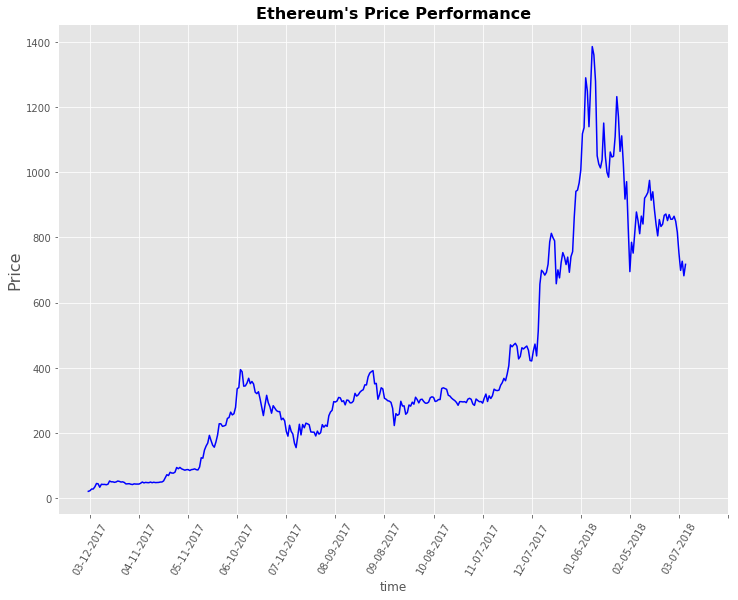

In [4]:
Ethereum_365days= """https://min-api.cryptocompare.com/data/histoday?fsym=ETH&tsym=USD&limit=365"""
Ethereum_365days= requests.get(Ethereum_365days)
Ethereum_365days = Ethereum_365days.json()
Ethereum_365days=Ethereum_365days['Data'] #taking the values of key called 'Data'                   
df_Ethereum365=pd.DataFrame(Ethereum_365days)

#modify unix time and set time as index
df_Ethereum365['time'] = pd.to_datetime(df_Ethereum365['time'],unit='s')
df_Ethereum365['time']= df_Ethereum365['time'].dt.strftime('%m-%d-%Y')
df_Ethereum365['time']= pd.DataFrame(df_Ethereum365['time'])
df_Ethereum365.head()
df_Ethereum365.set_index('time', inplace=True)
#getting just few dates for the x-axis
sequence= range(1,400,30)
df_Ethereum365['close'].plot(xticks= sequence,rot=60, figsize=(12,9),color='blue')
ethereum_new=df_Ethereum365
plt.title("Ethereum's Price Performance",fontweight='bold',size=16)
plt.ylabel("Price",size=16 )
plt.show()

Ethereum experienced a very similiar price growh when compared to Bitcoin. Its growth appears to be a little more volitle and  not as steady. Ethereum hit its all-time high a little later than Bitcoin, but just like Bitcoin its most recent price history has been in decline. Perhaps their prices are affected by one another and/or the same external factors.

#### Litecoin Daily Price Chart

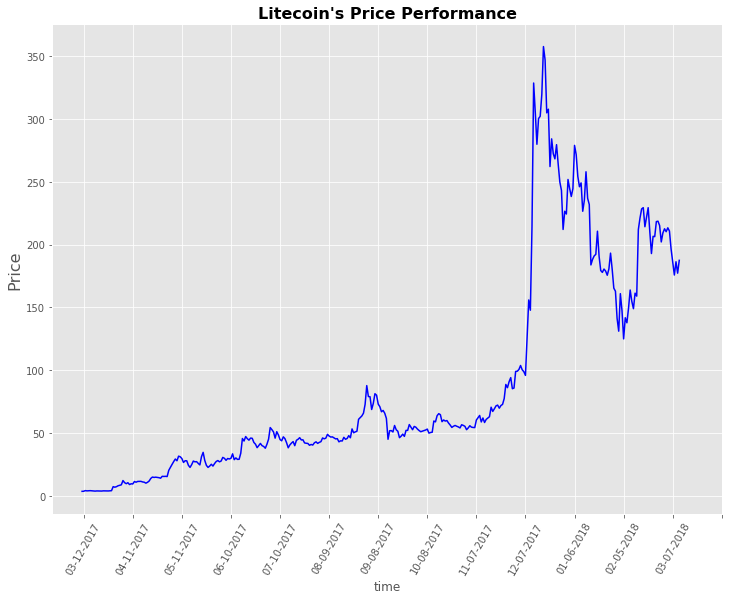

In [5]:
Litecoin_365days= """https://min-api.cryptocompare.com/data/histoday?fsym=LTC&tsym=USD&limit=365"""
Litecoin_365days= requests.get(Litecoin_365days)
Litecoin_365days = Litecoin_365days.json()
Litecoin_365days=Litecoin_365days['Data'] #taking the values of key called 'Data'                   
df_Litecoin365days=pd.DataFrame(Litecoin_365days)
#modify unix time and set time as index
df_Litecoin365days['time'] = pd.to_datetime(df_Litecoin365days['time'],unit='s')
df_Litecoin365days['time']= df_Litecoin365days['time'].dt.strftime('%m-%d-%Y')
df_Litecoin365days['time']= pd.DataFrame(df_Litecoin365days['time'])
df_Litecoin365days.head()
df_Litecoin365days.set_index('time', inplace=True)
#getting just few dates for the x-axis
sequence= range(1,400,30)
df_Litecoin365days['close'].plot(xticks= sequence,rot=60, figsize=(12,9),color='blue')
litecoin_new=df_Litecoin365days
plt.title("Litecoin's Price Performance",fontweight='bold',size=16)
plt.ylabel("Price",size=16 )
plt.show()

Litecoin also has a similar price chart, but its growth for most of the year was not as fast. Its December price raise was meteoric with it almost being straight up, and just like the other two cryptos, it ended in a decline.

#### Ripple Daily Price Chart

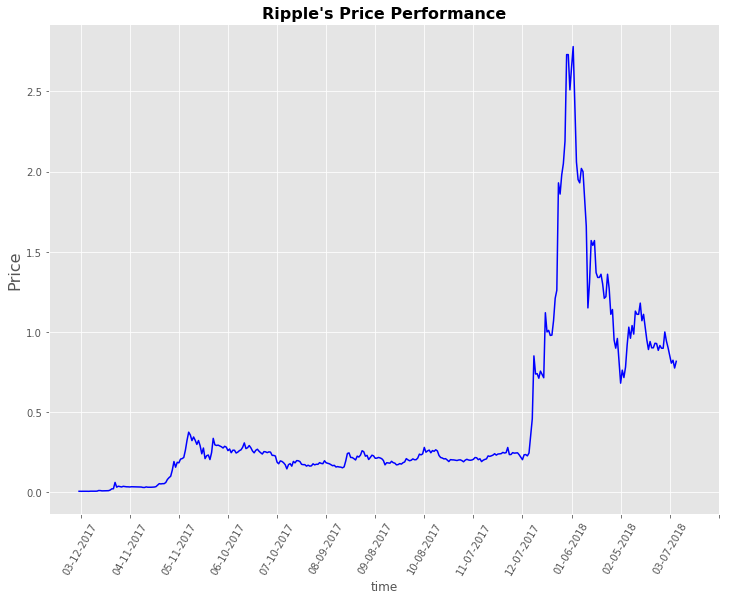

In [6]:
Ripple_365days= """https://min-api.cryptocompare.com/data/histoday?fsym=XRP&tsym=USD&limit=365"""
Ripple_365days= requests.get(Ripple_365days)
Ripple_365days = Ripple_365days.json()
Ripple_365days=Ripple_365days['Data'] #taking the values of key called 'Data'                   
df_Ripple365days=pd.DataFrame(Ripple_365days)
#modify unix time and set time as index
df_Ripple365days['time'] = pd.to_datetime(df_Ripple365days['time'],unit='s')
df_Ripple365days['time']= df_Ripple365days['time'].dt.strftime('%m-%d-%Y')
df_Ripple365days['time']= pd.DataFrame(df_Ripple365days['time'])
df_Ripple365days.head()
df_Ripple365days.set_index('time', inplace=True)
#getting just few dates for the x-axis
sequence= range(1,400,30)
df_Ripple365days['close'].plot(xticks= sequence,rot=60, figsize=(12,9),color='blue')
ripple_new=df_Ripple365days
plt.title("Ripple's Price Performance",fontweight='bold',size=16)
plt.ylabel("Price",size=16 )
plt.show()




For Ripple, it experienced mostly steady stagnation with some ups and downs. Just like the other three, it had a large price increase in later December and early January, and it end the period in decline.

In [7]:
### Extracting data from Crytocurrency API ###
bitcoin= """https://min-api.cryptocompare.com/data/histoday?fsym=BTC&tsym=USD&limit=365"""
bitcoin= requests.get(bitcoin)
bitcoin= bitcoin.json()
bitcoin=bitcoin['Data']                     
df_bitcoin=pd.DataFrame(bitcoin)
df_close_bitcoin= pd.DataFrame(df_bitcoin['close'])
#FOR ETHEREUM
Ethereum= """https://min-api.cryptocompare.com/data/histoday?fsym=ETH&tsym=USD&limit=365"""
Ethereum= requests.get(Ethereum)
Ethereum = Ethereum.json()
Ethereum=Ethereum['Data'] #taking the values of key called 'Data'                   
df_Ethereum=pd.DataFrame(Ethereum)
df_close_ethereum= pd.DataFrame(df_Ethereum['close'])
#FOR LITECOIN
Litecoin= """https://min-api.cryptocompare.com/data/histoday?fsym=LTC&tsym=USD&limit=365"""
Litecoin= requests.get(Litecoin)
Litecoin = Litecoin.json()
Litecoin=Litecoin['Data'] #taking the values of key called 'Data'                   
df_Litecoin=pd.DataFrame(Litecoin)
df_close_litecoin= pd.DataFrame(df_Litecoin['close'])
#FOR RIPPLE
Ripple= """https://min-api.cryptocompare.com/data/histoday?fsym=XRP&tsym=USD&limit=365"""
Ripple= requests.get(Ripple)
Ripple = Ripple.json()
Ripple=Ripple['Data'] #taking the values of key called 'Data'                   
df_Ripple=pd.DataFrame(Ripple)
df_close_ripple= pd.DataFrame(df_Ripple['close'])

Text(0.5,0.94,'Top 4 Cryptocurrencies')

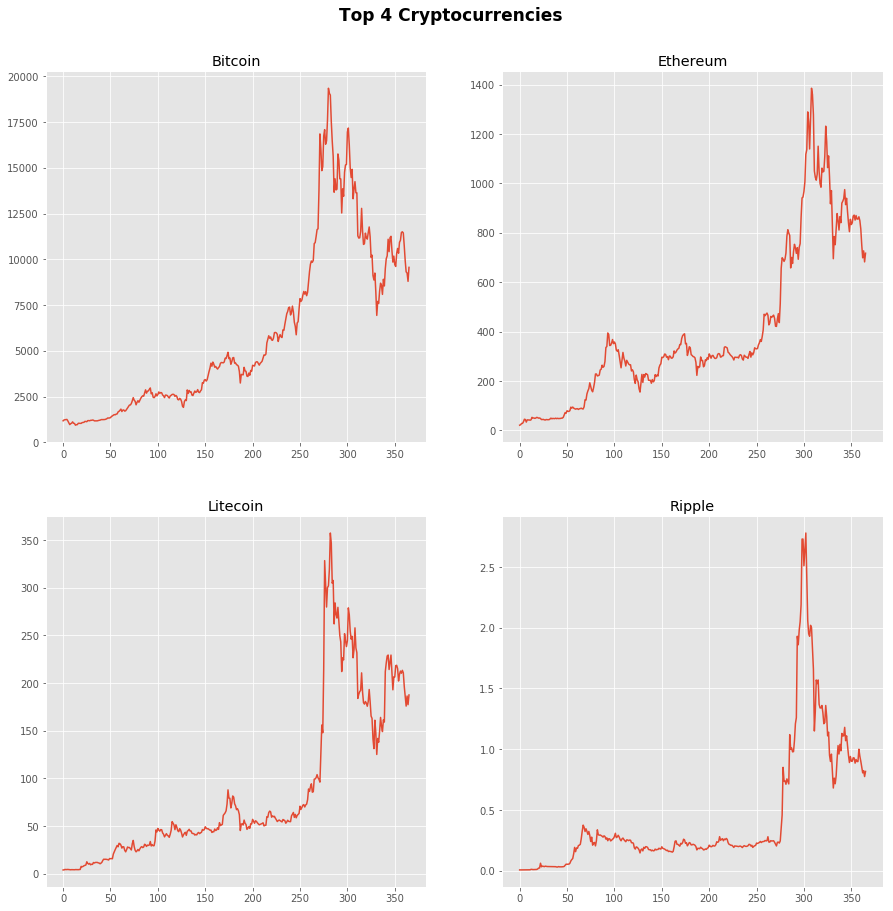

In [8]:
#df_close_bitcoin=  pd.DataFrame(df_bitcoin365days['close'])
#df_close_ethereum= pd.DataFrame(df_Ethereum365['close'])
#df_close_litecoin= pd.DataFrame(df_Litecoin365days[['close']])
#df_close_ripple= pd.DataFrame(df_Ripple365days[['close']])
f, axarr = plt.subplots(2, 2)
f.set_figheight(15)
f.set_figwidth(15)
#plot.figure(figsize=(12,9))
axarr[0, 0].plot(df_close_bitcoin)
axarr[0, 0].set_title('Bitcoin')
#axarr[0, 0].get_xaxis().set_visible(False)
axarr[0, 1].plot(df_close_ethereum)
axarr[0, 1].set_title('Ethereum')
#axarr[0, 1].get_xaxis().set_visible(False)
axarr[1, 0].plot(df_close_litecoin)
axarr[1, 0].set_title('Litecoin')
axarr[1, 1].plot(df_close_ripple)
axarr[1, 1].set_title('Ripple')
#f.suptitle('Cryptocurrency Boxplots', y=1.03, fontsize=17, weight='bold')

plt.suptitle('Top 4 Cryptocurrencies',y=0.94,weight='bold',fontsize=17)

#NOTE: if you want to hide the x-axis values then use:
#ie.axarr[0, 0].get_xaxis().set_visible(False)

All four of these top cryptocurrencies have similar trends with only slight deviations from one another.

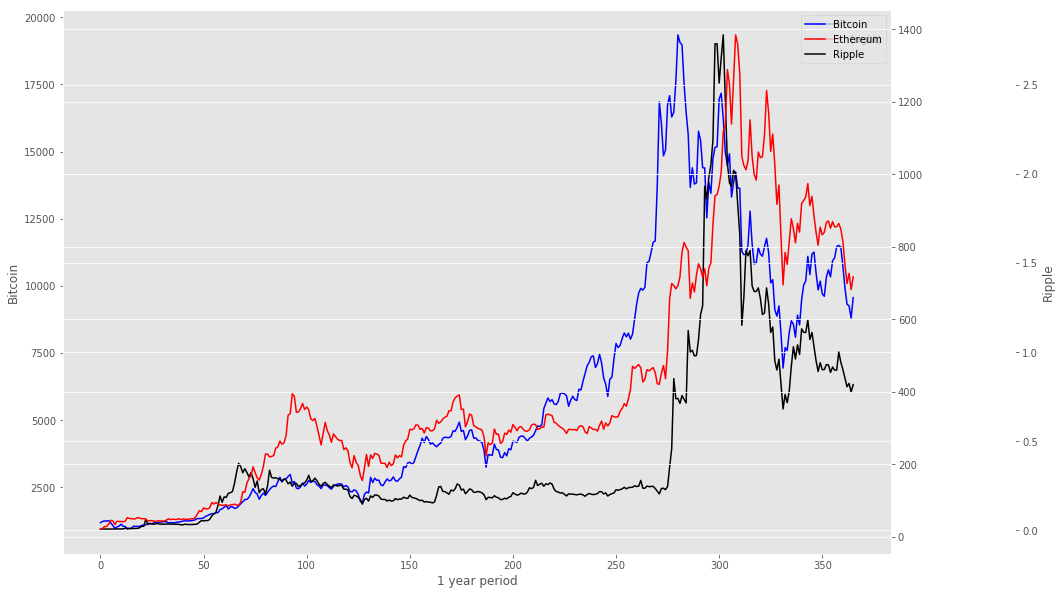

In [9]:
b=df_close_bitcoin
e=df_close_ethereum
l=df_close_litecoin
r=df_close_ripple
b.columns=['']
e.columns=['']
import matplotlib.pyplot as plt
import numpy as np
fig, ax1 = plt.subplots(figsize=(20, 10))
ax2 = ax1.twinx()
rspine = ax2.spines['right']
rspine.set_position(('axes', 1.15))
ax2.set_frame_on(True)
ax2.patch.set_visible(False)
fig.subplots_adjust(right=0.7)

b.plot(ax=ax1, style='b-',label='')
e.plot(ax=ax1, style='r-', secondary_y=True, label='')
r.plot(ax=ax2, style='k-', label='')
#Set labels
ax1.set_xlabel("1 year period")
ax1.set_ylabel("Bitcoin")
ax2.set_ylabel("Ethereum")
ax2.set_ylabel("Ripple")
ax2.legend([ax1.get_lines()[0], ax1.right_ax.get_lines()[0],ax2.get_lines()[0]], ['Bitcoin', 'Ethereum', 'Ripple'])

Here we have the top three and can see just how similar there paterns are. They all have similar growth paterns except in Ripple's case it was more stagnant; Bitcoin hit its all-time high first and then Ripple a little later and Ethereum right afterwards. They all ended the year-long period in a decline with Ripple being the worst perfomer and Bitcoin and Ethereum being about the same place.

## Analyzing Price Volatility and Rate of Return

In [10]:
#BITCOIN DATA  close - high - close - open - time - volumefrom - volumeto
bitcoin_365days= """https://min-api.cryptocompare.com/data/histoday?fsym=BTC&tsym=USD&limit=365"""
bitcoin_365days= requests.get(bitcoin_365days)
bitcoin_365days= bitcoin_365days.json()
bitcoin_365days=bitcoin_365days['Data']                     
df_bitcoin365days=pd.DataFrame(bitcoin_365days)
#Etherium DATA  close - high - close - open - time - volumefrom - volumeto
Ethereum_365days= """https://min-api.cryptocompare.com/data/histoday?fsym=ETH&tsym=USD&limit=365"""
Ethereum_365days= requests.get(Ethereum_365days)
Ethereum_365days = Ethereum_365days.json()
Ethereum_365days=Ethereum_365days['Data'] #taking the values of key called 'Data'                   
df_Ethereum365days=pd.DataFrame(Ethereum_365days)
#df_close_ethereum= pd.DataFrame(df_Ethereum365['close'])
#Litecoin DATA
Litecoin_365days= """https://min-api.cryptocompare.com/data/histoday?fsym=LTC&tsym=USD&limit=365"""
Litecoin_365days= requests.get(Litecoin_365days)
Litecoin_365days = Litecoin_365days.json()
Litecoin_365days=Litecoin_365days['Data'] #taking the values of key called 'Data'                   
df_Litecoin365days=pd.DataFrame(Litecoin_365days)
#Ripple DATA
Ripple_365days= """https://min-api.cryptocompare.com/data/histoday?fsym=XRP&tsym=USD&limit=365"""
Ripple_365days= requests.get(Ripple_365days)
Ripple_365days = Ripple_365days.json()
Ripple_365days=Ripple_365days['Data'] #taking the values of key called 'Data'                   
df_Ripple365days=pd.DataFrame(Ripple_365days)


## Statistical Analysis

In [11]:
#Crytocurrency Closing prices
close_bitcoin=df_bitcoin365days[["close"]].rename(index=str,columns={"close":"bitcoin"})
close_ethereum=df_Ethereum365days[["close"]].rename(index=str,columns={"close":"ethereum"})
close_litecoin=df_Litecoin365days[["close"]].rename(index=str,columns={"close":"litecoin"})
close_ripple=df_Ripple365days[["close"]].rename(index=str,columns={"close":"ripple"})
#axis=1 mean concat with respect to columns, axis=0(default) concat respect to rows
closeprice = pd.concat([close_bitcoin,close_ethereum,close_litecoin,close_ripple],axis=1)
closeprice.describe()

,bitcoin,ethereum,litecoin,ripple
count,366.000000,366.000000,366.000000,366.000000
mean,5906.979754,401.353251,87.064399,0.441942
std,4611.441502,318.161019,82.604300,0.533102
min,939.700000,21.450000,3.800000,0.005970
25%,2415.640000,204.045000,30.905000,0.179375
50%,4232.275000,300.840000,52.270000,0.227800
75%,9252.387500,474.645000,129.687500,0.352850
max,19345.490000,1385.020000,357.510000,2.780000


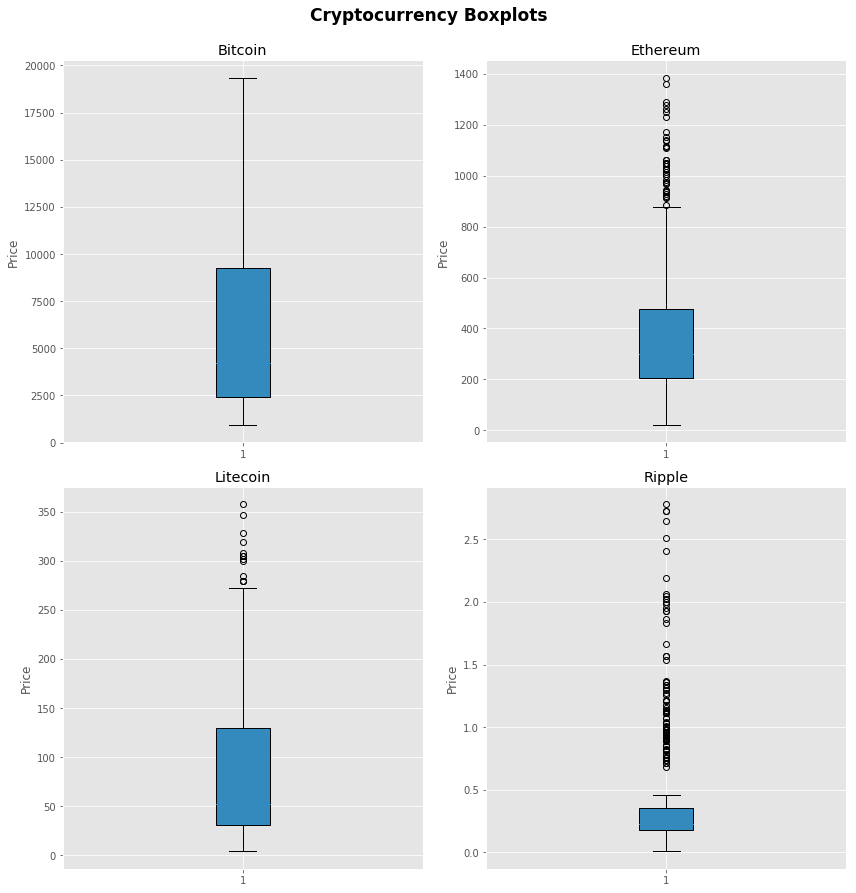

In [12]:
names = ["bitcoin","ethereum","litecoin","ripple"]
#result.boxplot(column=names,figsize=(6,6),grid=True,layout=(4,4))
#result.boxplot(column='bitcoin',figsize=(6,6),grid=True)

# Four axes, returned as a 2-d array
f, axarr = plt.subplots(2, 2)

axarr[0, 0].boxplot(closeprice['bitcoin'],patch_artist=True) #patch_artist(fill with color)
#axarr[0, 0].set_facecolor('blue')
axarr[0, 0].set_title('Bitcoin')
axarr[0, 0].set_ylabel('Price')
#axarr[0, 0].set_barcolor('green')
axarr[0, 1].boxplot(closeprice['ethereum'],patch_artist=True)
axarr[0, 1].set_title('Ethereum')
axarr[0, 1].set_ylabel('Price')
axarr[1, 0].boxplot(closeprice['litecoin'],patch_artist=True)
axarr[1, 0].set_title('Litecoin')
axarr[1, 0].set_ylabel('Price')
axarr[1, 1].boxplot(closeprice['ripple'],patch_artist=True )
axarr[1, 1].set_title('Ripple')
axarr[1, 1].set_ylabel('Price')
#Make the figue prettier
f.suptitle('Cryptocurrency Boxplots', y=1.03, fontsize=17, weight='bold')
f.set_figheight(12)
f.set_figwidth(12)
plt.tight_layout() #make sure label dont overlap
plt.show()

From these boxplots, it is clear that Bitcoin, Ethereum, and Litecoin have all had similar relative price trends. Ripple was the most different from the bunch with a much lower boxplot and a large number of upper end outliers. These cryptocurrencies had an increasing standard deviation as market capitaliztion went up. The price of a cryptocurency is relative, so even though one Bitcoin was worth about 19,000 U.S. Dollars and one Litecoin was worth about 350 U.S. Dollars, they each performed about the same because their percent growth was similar. 

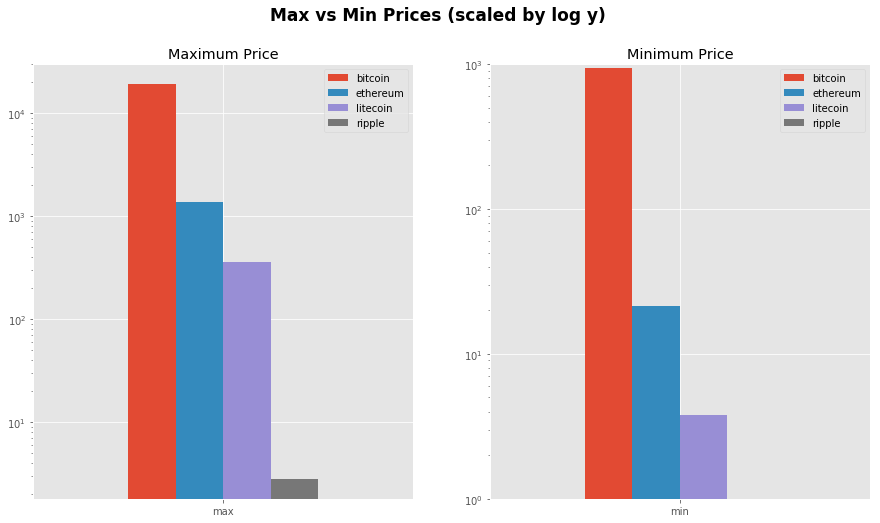

In [13]:
price_describe=closeprice.describe()
price_describe.loc[['min','max']]

#IF Want to create subplots 1 by 2 use this:
#fig, axes = plt.subplots(nrows=1, ncols=2)
#then df1.plot(ax=axes[0]....)
#and df2.plot(ax=axes[1])

fig, axes = plt.subplots(nrows=1, ncols=2)
price_describe.loc[['max']].plot.bar(ax=axes[0],figsize=(15,8),rot=360,title='Maximum Price',logy=True)
price_describe.loc[['min']].plot.bar(ax=axes[1],figsize=(15,8),rot=360,title='Minimum Price',logy=True,ylim=(1,1000))

fig.suptitle('Max vs Min Prices (scaled by log y)',weight='bold',fontsize=17)
plt.show()

The log maximum and minimum prices for each of these cryptocurrencies shows that each crypto had a larger max price and min prices than the crypto lower than it, starting from Bitcoin down to Ripple.

## By how much percentage have the cryptocurrency prices increased?



In [14]:
#price_describe=closeprice.describe()
#price_describe.loc[['min','max']]
df_bitcoin365days['close'].head()

0    1179.22
1    1225.11
2    1238.19
3    1243.14
4    1253.43
Name: close, dtype: float64

### Percentage increase in price  with respect to all time high are:

-***Bitcoin  = 1540%***

-***Ethereum = 6357%***

-***Litecoin = 9308%***

-***Ripple   = 44380%***

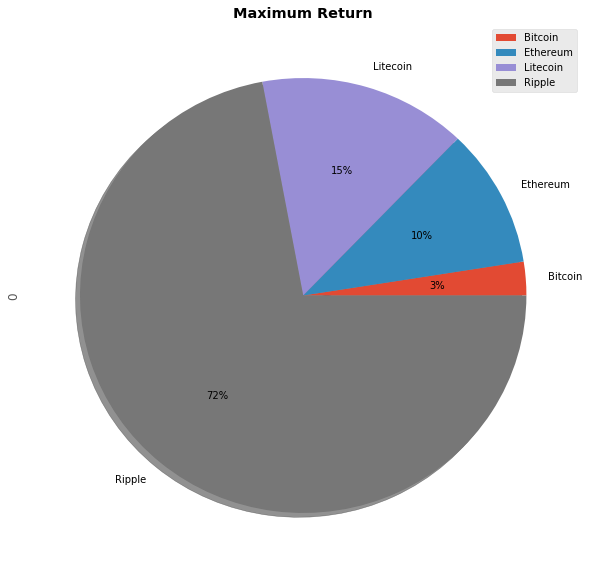

In [15]:
b=df_bitcoin365days['close']
e=df_Ethereum365['close']
l=df_Litecoin365days['close']
r=df_Ripple365days['close']
#From its maximum price
return_bitcoin=((b.max() - b.iloc[0])/b.iloc[0])*100
return_bitcoin
return_ethereum=((e.max() - e.iloc[0])/e.iloc[0])*100
return_ethereum
return_litecoin=((l.max() - l.iloc[0])/l.iloc[0])*100
return_litecoin
return_ripple=((r.max() - r.iloc[0])/r.iloc[0])*100
return_ripple
return2 =[return_bitcoin,return_ethereum,return_litecoin,return_ripple]
return2 = pd.DataFrame(return2)
return2=return2.transpose()
return_max=return2.rename(index=str, columns={0: "Bitcoin", 1: "Ethereum",2:"Litecoin",3:"Ripple"})

return_max=return_max.transpose()
return_max.head()

return_max.plot.pie(subplots=True,figsize=(10,10),shadow=True,autopct='%0.f%%' )
plt.title('Maximum Return',weight='bold')
plt.show()

### How much money would you have made if you invested $1000 a year ago and sold it at all time high?

- *** Return on Bitcoin  $15,400 ***
  
- *** Return on Ethereum $63,570 ***

- *** Return on Litecoin $93,080 ***

- *** Ripple on Ripple   $443,800 ***

Interestingly of the top four cryptocurrencies, they performed better in a decending order by market capitalization with Riple being the best and Bitcoin being the relative worst. Overall, each of these percentage increases are excellent.
These very large gains are due to and especially for Ripple the fact that at the begining of year-long period we measured the cryptocurrencies were worth almost nothing per coin. These gains also demonstrate why more and more people are drawn towards investing in cryptocurrency.

### How much could you have made if invested in cryptocurrency at the beginning of the year period and sold at the end?

In [16]:
return_bitcoin=((b.iloc[-1] - b.iloc[0])/b.iloc[0])*100
return_bitcoin
return_ethereum=((e.iloc[-1] - e.iloc[0])/e.iloc[0])*100
return_ethereum
return_litecoin=((l.iloc[-1] - l.iloc[0])/l.iloc[0])*100
return_litecoin
return_ripple=((r.iloc[-1] - r.iloc[0])/r.iloc[0])*100
return_ripple
return2 =[return_bitcoin,return_ethereum,return_litecoin,return_ripple]
return2 = pd.DataFrame(return2)
return2=return2.transpose()
return_today=return2.rename(index=str, columns={0: "Bitcoin", 1: "Ethereum",2:"Litecoin",3:"Ripple"})
return_today

,Bitcoin,Ethereum,Litecoin,Ripple
0,710.80884,3244.335664,4833.947368,12972.0


In [17]:
return_bitcoin


710.808839741524

In [18]:
return_ethereum

3244.335664335664

In [19]:
return_litecoin

4833.9473684210525

In [20]:
return_ripple

12972.0

These dollar values are not as extreme as the all time high percentage returns, but they are still respectable returns that would be more common for an investor to have made. This is because it is hard to know if a cryptocurrency will continue in its trend of growth or decline, and most fail to capture there investments at these peak times.

## Volume and Price Changes

### Can we anticipate price movements by looking at the number of transcations?

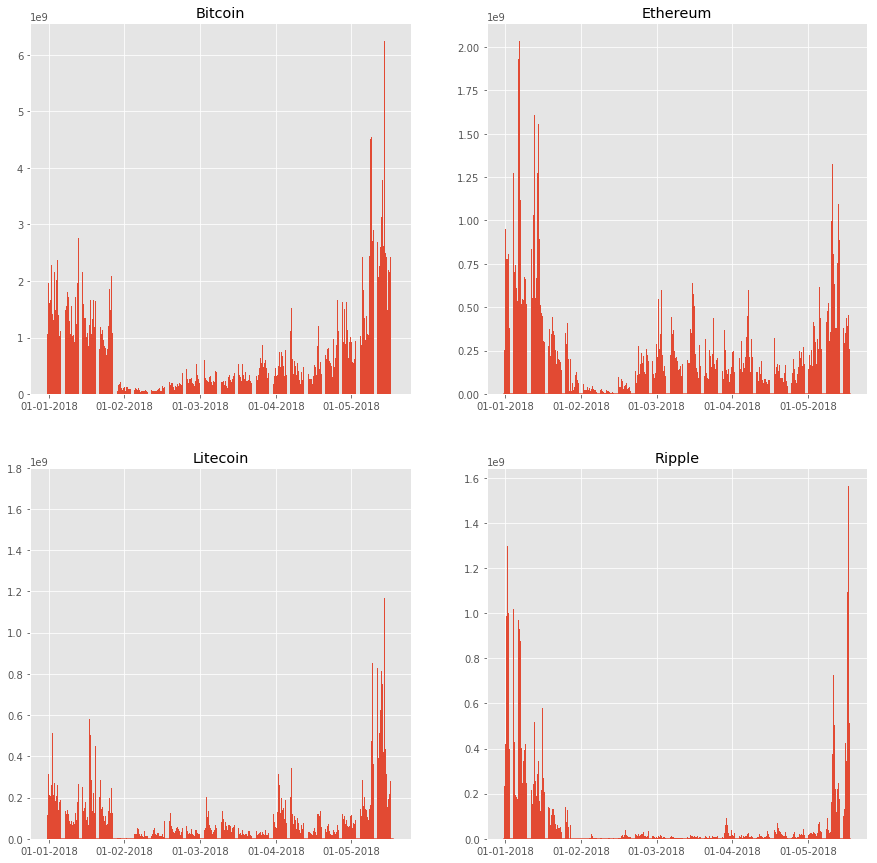

In [21]:
#rename(index=str, columns={'volumeto':bitcoin})
bb= bitcoin_new[['volumeto']]
ee= ethereum_new[['volumeto']]
ll= litecoin_new[['volumeto']]
rr=ripple_new[['volumeto']]
#return_today=return2.rename(index=str, columns={0: "Bitcoin", 1: "Ethereum",2:"Litecoin",3:"Ripple"})
sequence= range(1,360,80)
volume=pd.concat([bb,ee,ll,rr], axis=1)
volume.columns =['Bitcoin','Ethereum','Litecoin','Ripple']


f, axarr = plt.subplots(2, 2)
f.set_figheight(15)
f.set_figwidth(15)
#plot.figure(figsize=(12,9))
axarr[0, 0].bar(volume.index,volume['Bitcoin'])
axarr[0, 0].set_title('Bitcoin')
axarr[0, 0].set_xticks(sequence)

axarr[0, 1].bar(volume.index,volume['Ethereum'])
axarr[0, 1].plot(df_close_ethereum)
axarr[0, 1].set_title('Ethereum')
axarr[0, 1].set_xticks(sequence)

axarr[1, 0].bar(volume.index,volume['Litecoin'])
axarr[1, 0].plot(df_close_litecoin)
axarr[1, 0].set_title('Litecoin')
axarr[1, 0].set_xticks(sequence)

axarr[1, 1].bar(volume.index,volume['Ripple'])
axarr[1, 1].plot(df_close_ripple)
axarr[1, 1].set_title('Ripple')
axarr[1, 1].set_xticks(sequence)

plt.show()

From these graphs it is clear that there are two big hotspots for trades at the beginning and end of the period. Ethereum and Bitcoin appear to have the overall larger trade volumes while Litecoin and Ripple have lower ammounts of trade volueme. This shows which cryptos were more popular with investors, but it does not necessarily mean a cryptocurrency had a better price performance.

In [22]:
axarr[0, 0].plot(df_close_bitcoin)
axarr[0, 0].set_title('Bitcoin')
#axarr[0, 0].get_xaxis().set_visible(False)
axarr[0, 1].plot(df_close_ethereum)
axarr[0, 1].set_title('Ethereum')
#axarr[0, 1].get_xaxis().set_visible(False)
axarr[1, 0].plot(df_close_litecoin)
axarr[1, 0].set_title('Litecoin')
axarr[1, 1].plot(df_close_ripple)
axarr[1, 1].set_title('Ripple')

Text(0.5,1,'Ripple')

## Does Stock Market Performance Affect the Cryptocurrency Market?
#### -The Standard & Poor's 500, often abbreviated as the S&P 500, or just the S&P, is an American stock market index based on the market capitalizations of 500 large companies having common stock listed on the NYSE or NASDAQ.
#### - It is one of the most commonly followed equity indices, and many consider it one of the best representations of the U.S. stock market.

In [23]:
#GETTING S&P500 data and cleaning it up
#IT WAS 251 DAYS because s&p500 only works monday to friday
sp500=pd.read_csv('S&P500.csv')
sp500.head()
sp500=sp500.rename(index=str, columns={"Date":"time","Open":"open","High":"high","Low":"low","Close":"close","Volume":"volumeto"})
sp500.head()
#convert time column as datetime, then strfttime
sp500['time']=pd.to_datetime(sp500['time'])
sp500['time']=sp500['time'].dt.strftime("%m-%d-%Y")
sp500['time'].shape #IT WAS 251 DAYS
sp500=sp500.set_index('time')
sp500[['close']].head()

,close
time,
03-13-2017,2373.469971
03-14-2017,2365.449951
03-15-2017,2385.260010
03-16-2017,2381.379883
03-17-2017,2378.250000


In [24]:
##CHECKING THE FORMAT OF SP500 AND BITCOIN NEW
bitcoin_new.head()

,close,high,low,open,volumefrom,volumeto
time,,,,,,
03-11-2017,1179.22,1202.69,1104.78,1112.39,70747.22,82387198.06
03-12-2017,1225.11,1235.46,1160.90,1179.22,44412.09,53441762.07
03-13-2017,1238.19,1245.63,1205.61,1225.11,60460.94,74376298.14
03-14-2017,1243.14,1255.52,1218.38,1238.19,45142.05,56058617.23
03-15-2017,1253.43,1256.95,1236.43,1243.14,43592.40,54486699.63


In [25]:
df1=bitcoin_new[['close']]
df2=sp500[['close']]
#You can add parameters left_index=True and right_index=True 
#if you need merge by indexes in function merge:
merge=pd.merge(df1,df2, how='inner', left_index=True, right_index=True)
merge=merge.rename(index=str,columns={'close_x':'Bitcoin','close_y':'SP500'})
merge.head()


,Bitcoin,SP500
time,,
03-13-2017,1238.19,2373.469971
03-14-2017,1243.14,2365.449951
03-15-2017,1253.43,2385.260010
03-16-2017,1172.88,2381.379883
03-17-2017,1071.71,2378.250000


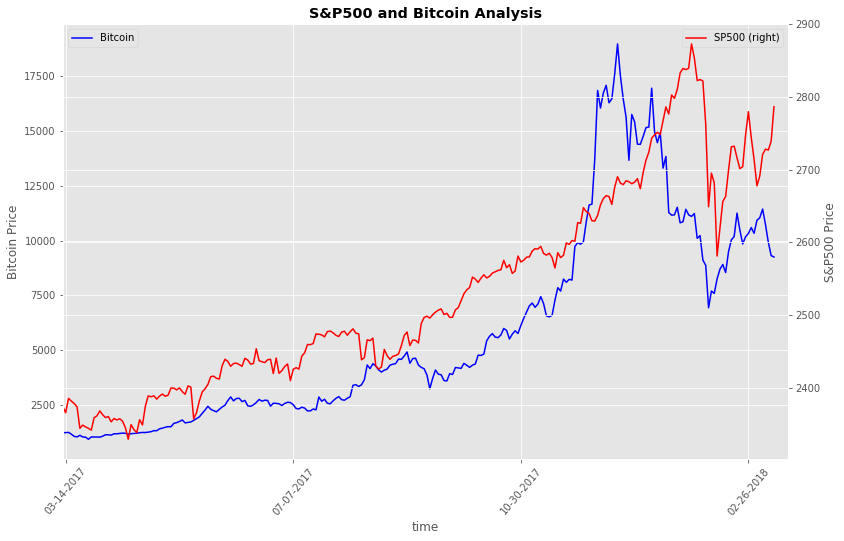

In [26]:
fig, ax1 = plt.subplots()

#sp500['close'].plot(ax=ax1,figsize=(15,9),xticks= sequence,rot=90,color="b",grid=True)
merge['Bitcoin'].plot(ax=ax1,color='b',figsize=(13,8),xticks=sequence,rot=50)
plt.ylabel('Bitcoin Price')
ax1.legend(loc='upper left')

ax2= ax1.twinx()
merge['SP500'].plot(ax=ax2,color='r',secondary_y=True,xlim=(0,255),legend=True)
plt.ylabel('S&P500 Price')

plt.title('S&P500 and Bitcoin Analysis',fontweight="bold")
plt.show()

It is very clear that these lines are quite similar because they share upwards growth movements to a large peak and dip hard at about the same time. Thet differ towards the end with bitcoin decreas and the S&P 500 increasing.

### Linear Regression Model and Correlation

In [27]:
bitcoin1=bitcoin_new['close']
sp5001=sp500[['close']]
#Compute pairwise correlation
merge.corr()

,Bitcoin,SP500
Bitcoin,1.000000,0.876534
SP500,0.876534,1.000000


### Correlation coefficient = 0.873

Here you it is clear the correlation coefficient is quite large. This demonstrates that the the linear dependence of two variables is significant. The trends of the S&P 500 and Bitcoin measured during this year-long period are highly correlated with each other.

In [28]:
import numpy as np
from sklearn.linear_model import LinearRegression
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/macbook/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime', 'f', 'axes', 'e']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [29]:
new=merge.reset_index()
merge=new[['Bitcoin','SP500']]
merge.head()

,Bitcoin,SP500
0,1238.19,2373.469971
1,1243.14,2365.449951
2,1253.43,2385.260010
3,1172.88,2381.379883
4,1071.71,2378.250000


In [30]:
npMatrix = np.matrix(merge)
Y,X = npMatrix[:,0], npMatrix[:,1] #X is SP500 and Y is Bitcoin
model=LinearRegression().fit(X,Y)
m=model.coef_[0] #slope
b=model.intercept_ #interception
print ("Linear Regresion Model(Bitcoin vs S&P500):")
print("y= {0}x + {1}".format(m,b))

Linear Regresion Model(Bitcoin vs S&P500):
y= [29.01196353]x + [-67565.15031938]


In [31]:
type(X)

numpy.matrixlib.defmatrix.matrix

In [32]:
import bokeh.io # conda install bokeh

from bokeh.plotting import figure, show
bokeh.io.output_notebook()

p = figure(title = "Linear Regression Model - Bitcoin vs S&P500 Index", width = 800, height = 500)
p.title.align='center'

p.background_fill_color = "khaki"
p.background_fill_alpha = 0.5
p.xaxis.axis_label = "S&P500"
p.yaxis.axis_label = "Bitcoin"
p.scatter(merge['SP500'],merge['Bitcoin'], fill_color="blue",size=6)
p.line(merge['SP500'],29.01196353*merge['SP500']-67565.15031938, color="red")
show(p)

Loading BokehJS ...

This interactive linear regression model demonstrates the strong positive linear trend Bitcoin and the S&P 500 share with one another. The variables meet at increasingly higher points with one another creating an increasing line.

In [33]:
#EXTRA: THIS CODE WILL GIVE US THE SCATTER PLOT BY USING MATPLOTLIB TECHNIQUE
#plt.scatter(X,Y, color='blue')
#fig, ax1 = plt.subplots()
#merge['Bitcoin'].plot(ax=ax1,color='b',figsize=(13,8),xticks=sequence,rot=50)
#plt.figure(figsize=(14,9))
#plt.scatter(merge['SP500'],merge['Bitcoin'], color='blue',label='')
#plt.plot(merge['SP500'],29.01196353*merge['SP500']-67565.15031938,'r',label='Linear Model')
#plt.xlabel("S&P500",fontsize=15)
#plt.ylabel("Bitcoin",fontsize=15)
#plt.legend(loc='upper left',fontsize=12)
#plt.title('Linear Regression Model Bitcoin and S&P500',fontweight="bold",)
#plt.show()

## Does the price of the U.S. Dollar affect the price of Bitcoin?

In [34]:
#GETTING US DOLLAR INDEX DATA FROM YAHOO FINANCE
USdollar=pd.read_csv('USdollar.csv')
USdollar.head()
USdollar=USdollar.rename(index=str, columns={"Date":"time","Open":"open","High":"high","Low":"low","Close":"close","Volume":"volumeto"})
USdollar.head()
#convert time column as datetime, then strfttime
USdollar['time']=pd.to_datetime(USdollar['time'])
USdollar['time']=USdollar['time'].dt.strftime("%m-%d-%Y")
USdollar['time'].shape #IT WAS 251 DAYS
USdollar=USdollar.set_index('time')
USdollar[['close']].head()

,close
time,
03-13-2017,101.379997
03-14-2017,101.699997
03-15-2017,100.739998
03-16-2017,100.269997
03-17-2017,100.300003


In [35]:
df1=bitcoin_new[['close']]
df2=USdollar[['close']]
#You can add parameters left_index=True and right_index=True 
#if you need merge by indexes in function merge:
merge2=pd.merge(df1,df2, how='inner', left_index=True, right_index=True)
merge2=merge2.rename(index=str,columns={'close_x':'Bitcoin','close_y':'USdollar'})
merge2=merge2.dropna(0,how='any')
merge2.tail()

,Bitcoin,USdollar
time,,
03-05-2018,11440.73,90.080002
03-06-2018,10735.45,89.620003
03-07-2018,9928.56,89.639999
03-08-2018,9316.72,90.120003
03-09-2018,9252.76,90.089996


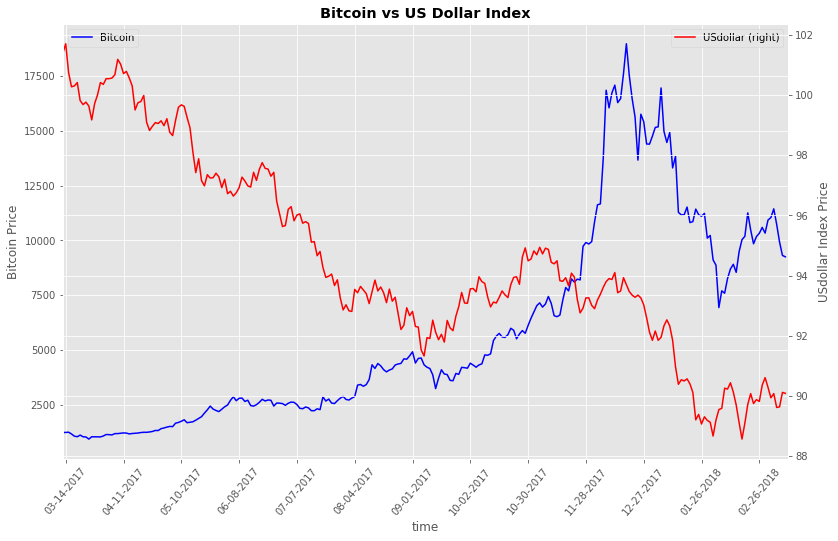

In [36]:
fig, ax1 = plt.subplots()
#sp500['close'].plot(ax=ax1,figsize=(15,9),xticks= sequence,rot=90,color="b",grid=True)
sequence2= range(1,400,20)
merge2['Bitcoin'].plot(ax=ax1,color='b',figsize=(13,8),xticks=sequence2,rot=50, xlim=(0,400))
plt.ylabel('Bitcoin Price')
ax1.legend(loc='upper left')
ax2= ax1.twinx()
merge2['USdollar'].plot(ax=ax2,color='r',secondary_y=True,xlim=(0,251),legend=True)
plt.ylabel('USdollar Index Price')

plt.title('Bitcoin vs US Dollar Index',fontweight="bold")
plt.show()

From this graph it appears that when the U.S. Dollar is performing well, Bitcoin is performing badly and vice versa. This indicates a possible negative correlation.

In [37]:
merge2.corr()  # -0.6 means: for every positive increase in one variable, there is a negative decrease

,Bitcoin,USdollar
Bitcoin,1.000000,-0.658601
USdollar,-0.658601,1.000000


### Correlation coefficient = -0.659

This correlation coefficient is relatively significant and negative which demonstrates that the the linear dependence of two variables is significant, and that the U.S. Dollar and Bitcoin are negatively correlated. This is interesting because these two forms of currency are natual competitors with the U.S. Dollar being a centralized fiat currency and Bitcoin being a completly digital and decentralized currency.

In [38]:
merge2=merge2.dropna(0,how='any')
merge2.head()

,Bitcoin,USdollar
time,,
03-13-2017,1238.19,101.379997
03-14-2017,1243.14,101.699997
03-15-2017,1253.43,100.739998
03-16-2017,1172.88,100.269997
03-17-2017,1071.71,100.300003


In [39]:
npMatrix2 = np.matrix(merge2)
X,Y = npMatrix2[:,1], npMatrix2[:,0] #X is USdollar and Y is Bitcoin
model2=LinearRegression().fit(X,Y)
m=model2.coef_[0] #slope
b=model2.intercept_ #interception
print ("Linear Regresion Model(Bitcoin vs US Dollar:")
print("y= {0}x + {1}".format(m,b))

Linear Regresion Model(Bitcoin vs US Dollar:
y= [-912.70310421]x + [92118.67551275]


In [40]:
import bokeh.io 
bokeh.io.output_notebook()
from bokeh.plotting import figure, show

p2 = figure(title = "Linear Regression Model - Bitcoin vs US Dollar Index", width = 800, height = 500)
p2.title.align='center'
p2.background_fill_color = "khaki"
p2.background_fill_alpha = 0.5
p2.xaxis.axis_label = "US Dollar Index"
p2.yaxis.axis_label = "Bitcoin"
p2.scatter(merge2['USdollar'],merge2['Bitcoin'], fill_color="blue",size=6)
p2.line(merge2['USdollar'],m*merge2['USdollar']+b, color="red")
show(p2)

Loading BokehJS ...

This interactive linear regression model demonstrates the negative linear trend Bitcoin and the U.S. Dollar share with one another. The variables meet at decreasingly lower points with one another creating a decreasing line. As the price of one increases, the other decreases.

# - Part II:
## Exploring Cryptocurrency Social Data
#### Objectives:
- ** See the relevance of top cryptocurrencies on Reddit **
- ** Analyze popular current words from the cryptocurrency subreddit **
- ** Compare and contrast popular words during a decline and growth **

## Analyzing which top cryptocurrencies have the most relevence

In [41]:
# Python Reddit API Wrapper
import praw

reddit = praw.Reddit(client_id='FXuNKQYfYDWEdQ',
                     client_secret='vIa43NLdS3tehHvNdlYBInttGQg',
                     user_agent='PleaseGiveGoodGrade')

print(reddit.read_only)

True


In [42]:
# Function that searchs a subreddit by popularity, reddit calls it 'hot' which is the posts with the most upvotes recently.
# With 'limit = None', this fuction gathers data as far back as it can.
def reddit_hotsearcher(subreddit):
    return [submission.title for submission in reddit.subreddit(subreddit).hot(limit=None)]

In [43]:
# Search r/cryptocurrencey subreddit
hotcrypto = reddit_hotsearcher('cryptocurrency')
hotcrypto

['Weekly Skeptics Discussion - March 18, 2018',
 'Daily General Discussion - March 18, 2018',
 'G20 Meeting: "Crypto-assets do not pose risks to global financial stability at this time"',
 'Nanex Exchange has been added to Coinmarketcap',
 "Any other HODL'ers just not give a damn about the market at the moment..and barely even look at how things are doing?",
 'Everyone should really relax! Here’s why! (From a PhD student in Economics working on a dissertation that is about Crypto)',
 'IOTA: An eco-friendly alternative to blockchain',
 'EOS team is dumping thousands of ETH',
 'G20 focuses on rules review, holds fire on cryptocurrencies.',
 'G20 Puts Crypto Regulation on Hold – Crypto Prices Surge',
 'British Bank Barclays Partners with Coinbase',
 'Bear Market: To-do List',
 'The G20 Meeting Will Be A Historic Event For Cryptocurrency',
 'ARK CON: ARK’s First Official Meet-Up ARK CON is a multi-day event consisting of the ARK Team & Founders, members of the AMF, Government officials fro

In [44]:
# Searches for matches to terms from subreddit results.
def add_match(data, terms):
    results = sum(terms in title.lower() for title in data)
    return results

In [45]:
# Top 10 cryptocurrencies ranked by market capitalization.
# Market Capitalization is a common way to rank the relative size of a cryptocurrency. 
# It's calculated by multiplying the Price by the Circulating Supply. 
# Search from 'hot' posts from r/cryptocurrency with top 10 cryptos in the title and add results. Full name and abbrevation are used.

bitcoin = add_match(hotcrypto, 'btc') + add_match(hotcrypto, 'bitcoin') 
ethereum = add_match(hotcrypto, 'eth') + add_match(hotcrypto, 'ethereum')
ripple = add_match(hotcrypto, 'xrp') + add_match(hotcrypto, 'ripple')
bitcoin_cash = add_match(hotcrypto, 'bch') + add_match(hotcrypto, 'bitcoin cash')
litecoin = add_match(hotcrypto, 'ltc') + add_match(hotcrypto, 'litecoin')
neo = add_match(hotcrypto, 'neo') + add_match(hotcrypto, 'neo')
cardano = add_match(hotcrypto, 'ada') + add_match(hotcrypto, 'cardano')
stellar = add_match(hotcrypto, 'xlm') + add_match(hotcrypto, 'stellar')
monero = add_match(hotcrypto, 'xmr') + add_match(hotcrypto, 'monero')
eos = add_match(hotcrypto, 'eos') + add_match(hotcrypto, 'eos')

top10 = [bitcoin, ethereum, ripple, bitcoin_cash, litecoin, neo, cardano, stellar, monero, eos]

In [46]:
# Search r/news subreddit
hotnews = reddit_hotsearcher('news')
hotnews

['Male contraceptive pill is safe to use and does not harm sex drive, first clinical trial finds',
 'Unlicensed driver who killed 13 year old teen while driving given 80 hours community service',
 'After a boy fractured his skull in rural Missouri, family faces air ambulance bill of $32,000',
 'Missouri a destination wedding spot — for 15 year-old brides',
 'Performer dies after fall during Cirque du Soleil show',
 'AP Exclusive: Kushner Cos. filed false NYC housing paperwork',
 '7 cases of measles identified in Kansas; officials fear more could be exposed',
 "Africa's only female president will resign over expense claims",
 'Wilco deputy fired after allegedly assaulting 12-year-old girl at BBQ restaurant',
 "Deputy mistakes ashes of man's late daughter for drugs during traffic stop - Story",
 '‘We Are Chinese’: How China Is Influencing Sierra Leone’s Presidential Election',
 'DA O’Malley Took $10K From Fremont Police Union Before Clearing Fremont Cops in Killing of Pregnant Teen | Eas

In [47]:
# Same as before but 10 ten cryptos mentioned from the r/news subreddit.
bitcoinn = add_match(hotcrypto, 'btc') + add_match(hotnews, 'bitcoin') 
ethereumn = add_match(hotcrypto, 'eth') + add_match(hotnews, 'ethereum')
ripplen = add_match(hotcrypto, 'xrp') + add_match(hotnews, 'ripple')
bitcoin_cashn = add_match(hotcrypto, 'bch') + add_match(hotnews, 'bitcoin cash')
litecoinn = add_match(hotcrypto, 'ltc') + add_match(hotnews, 'litecoin')
neon = add_match(hotcrypto, 'neo') + add_match(hotnews, 'neo')
cardanon = add_match(hotcrypto, 'ada') + add_match(hotnews, 'cardano')
stellarn = add_match(hotcrypto, 'xlm') + add_match(hotnews, 'stellar')
moneron = add_match(hotcrypto, 'xmr') + add_match(hotnews, 'monero')
eosn = add_match(hotcrypto, 'eos') + add_match(hotnews, 'eos')

top10n = [bitcoinn, ethereumn, ripplen, bitcoin_cashn, litecoinn, neon, cardanon, stellarn, moneron, eosn]

In [48]:
# Search for 'hot' posts from all subreddits combined.
hotall = reddit_hotsearcher('all')
hotall

['An election worker in Russia places balloons in front of a camera before they begin ballot counting.',
 'The cat knocked my daughter’s fish bowl off the dresser.',
 'T’Challa better be taking notes 📝',
 'The Cafe at my closest beach gives free drinks to people who collect a bucket of litter from the beach',
 'TIL an IKEA in the Netherlands had to cancel their 1 euro breakfast special because it attracted too many customers and caused traffic jams on the highway.',
 "Ivanka Trump takes heat for acting as secretary of state: 'This is blatant nepotism'",
 'The United States spent approximately twice as much as other high-income countries on medical care, yet utilization rates were largely similar to those in other nations. Prices of labor and goods, including pharmaceuticals and devices, and administrative costs appeared to be main drivers - JAMA',
 "Stephen Hawking leaves behind 'breathtaking' final multiverse theory - A final theory explaining how mankind might detect parallel univers

In [49]:
# Same as before but for every post that is 'hot'
bitcoina = add_match(hotcrypto, 'btc') + add_match(hotall, 'bitcoin') 
ethereuma = add_match(hotcrypto, 'eth') + add_match(hotall, 'ethereum')
ripplea = add_match(hotcrypto, 'xrp') + add_match(hotall, 'ripple')
bitcoin_casha = add_match(hotcrypto, 'bch') + add_match(hotall, 'bitcoin cash')
litecoina = add_match(hotcrypto, 'ltc') + add_match(hotall, 'litecoin')
neoa = add_match(hotcrypto, 'neo') + add_match(hotall, 'neo')
cardanoa = add_match(hotcrypto, 'ada') + add_match(hotall, 'cardano')
stellara = add_match(hotcrypto, 'xlm') + add_match(hotall, 'stellar')
moneroa = add_match(hotcrypto, 'xmr') + add_match(hotall, 'monero')
eosa = add_match(hotcrypto, 'eos') + add_match(hotall, 'eos')

top10a = [bitcoina, ethereuma, ripplea, bitcoin_casha, litecoina, neoa, cardanoa, stellara, moneroa, eosa]

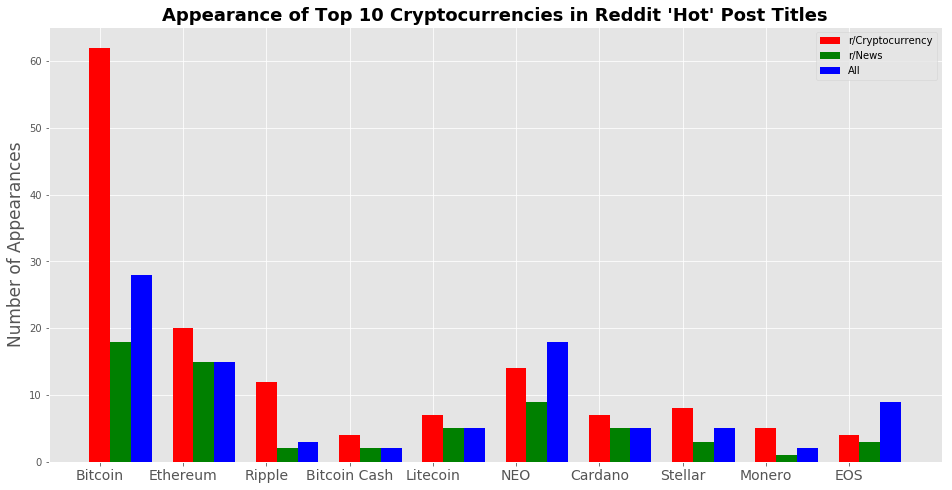

In [50]:
# Cryptocurrencies are displayed in decending order based on marketcapitaliztion.
top10names = 'Bitcoin', 'Ethereum', 'Ripple', 'Bitcoin Cash', 'Litecoin', 'NEO', 'Cardano', 'Stellar', 'Monero', 'EOS'
y_pos = np.arange(len(top10))

plt.figure(figsize=(16,8))
plt.bar(y_pos + 0.00, top10, color = 'r', width = 0.25, label='r/Cryptocurrency')
plt.bar(y_pos + 0.25, top10n, color = 'g', width = 0.25, label='r/News')
plt.bar(y_pos + 0.50, top10a, color = 'b', width = 0.25, label='All')

plt.xticks(y_pos, top10names, size=14)
plt.ylabel('Number of Appearances', size=17)
plt.title("Appearance of Top 10 Cryptocurrencies in Reddit 'Hot' Post Titles",fontweight='bold', size=18)
plt.legend(loc='upper right')
plt.show()    

This graph shows that the king of crypto, Bitcoin, is still a the top when it comes to relevence in the cryptocurrency subreddit, and it shares the highest amount of appearances as Ethereum on the news subreddit. However on all subreddits, NEO has had the most appearances overall and is higher than all other alt coins. Besides Bitcoin, Ethereum, and NEO, the other top ten cryptocurrencies are not nearly as prevelant. The size of the marketcapitalization besides the top two does not seem to make a difference as far as number of appearances. There must be external factors such as new developments or price performance that gives NEO relatively higher post title appearances than other alt coins.

## Recently hot words from the cryptocurrency subreddit

(-0.5, 799.5, 409.5, -0.5)

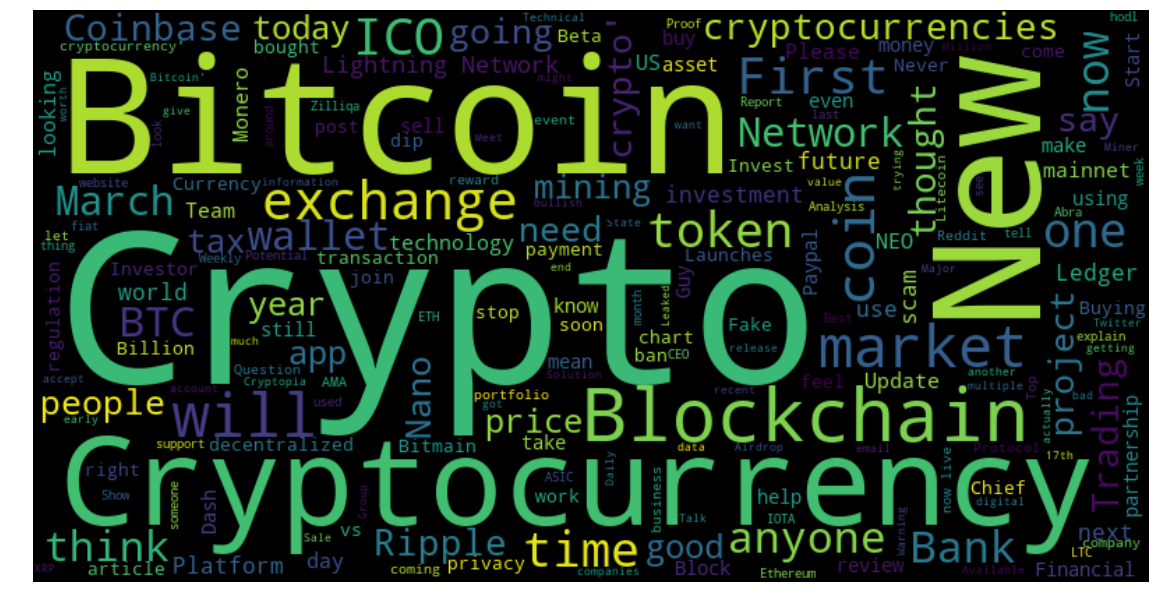

In [52]:
# Create Word Cloud
from wordcloud import WordCloud, STOPWORDS

hotcryptowords = str(hotcrypto) #Turns hot crypto results into one big string so it can be read into a word cloud.

stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=800, height=410, background_color="black", stopwords=stopwords).generate(hotcryptowords)

plt.figure(figsize=(20,11))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") 

Here you can see common hot topics from the cryptocurrency subreddit. Besided forms of the word cryptocurrency, hot topics are bitcoin, new, blockchain, exchange, and market. Most of the talk has to do with cryptocurrency news, market trends, and Bitcoin.

## Topics discussed during a growth period versus a decline.

In [53]:
# Function that searchers a subreddit for all of post titles from a start and end time in unix timestamp format.
# A unix timestamp converter website was used in order to covert the dates into the timestamp format.
def reddit_timesearcher(subreddit, start, end):
    return [submission.title for submission in reddit.subreddit(subreddit).submissions(start,end)]

In [57]:
# Month-long period of large cryptocurrency performance growth: 11/18/2017 to 12/18/2017
cryptogrowth = reddit_timesearcher('cryptocurrency',1510963200,1513555200)
cryptogrowth

['Poloniex need to get their shit together',
 "Why don't more people use Bisq / Bitsquare DEX",
 'Pre-sale question',
 'Phore is about to Crash or Explode.',
 'Guide to buy coins other then BTC, ETH & LTC',
 'CryptoHedge has half his net worth on Vertcoin',
 'Trident Group - What do you guys think?',
 'Total crypto market cap down $17 billion dollars today.',
 'XUEZ Upcoming Hard Fork from XIOS Collapse',
 '12 Days of Christmas Day 5 Coin Giveaway',
 'CME Launches Bitcoin Futures, Front-Month Opens At $20,650 Quickly Falls Below $20K',
 'Building Your Own Crypto Mining Rig - Hardware Ideas',
 'Why I’m bullish on QASH • r/LiquidQASH',
 'CME Bitcoin futures launched!',
 'Can anyone help? I sent ETH to my ACX ETH deposit address a few days and it is still not in my ACX account.',
 'Thoughts on Mobilecoin?',
 'Can someone explain Ark’s voting and Neo’s gas to me?',
 'Just started in Crypto - looking for tips',
 'CME Bitcoin futures have started trading',
 'Are certain coins starting to sur

In [55]:
# Month-long period of large cryptocurrency performance decline: 01/12/2018 to 02/12/2018
cryptodecline = reddit_timesearcher('cryptocurrency',1515715200,1518393600)
cryptodecline

['Ethereum Classic (ETC) to moon before Callisto airdrop?',
 'Even through the dip Revain coin has steadily climbed up to 6x the amount it was on Jan. 8th.',
 'Effect of Binance Trading Competitions on Cryptocurrency Price',
 'FLASH firmware for Trezor bounty (75,000 Flash)',
 'When you invest everything in crypto',
 'UCASH: Is this legit or is it the biggest Pump & Dump ever?',
 'Something to lighten your mood after 2018’s attack on your holdings!',
 'The data generated by the capuchin monkeys, Chen says, ”make them statistically indistinguishable from most stock-market investors.” (X-post /r/wsb)',
 'Minimum Wage To Financial Freedom With CryptoCurrency',
 'Oh the irony...',
 'Senate Candidate in MO Austin Petersen making waves with Bitcoin donations',
 'New dApp',
 'What The Hell is UCash?',
 'Moonshot Week 3: Dragonchain (DRGN), The Brainchild of Disney',
 'Mining on ThreadRipper? How viable is this really?',
 'Anyone else see whats going on with U.CASH??? ridiculous growth today..

(-0.5, 799.5, 409.5, -0.5)

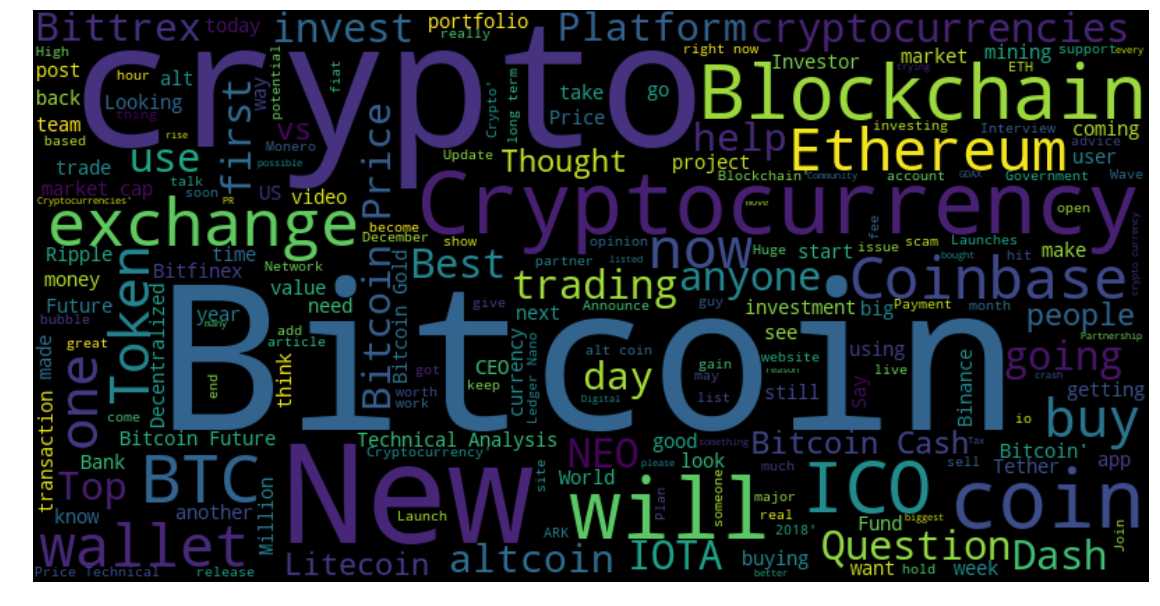

In [58]:
# Create Growth Word Cloud
cryptogrowthwords = str(cryptogrowth) #Turns results into one big string so it can be read into a word cloud.

stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=800, height=410, background_color="black", stopwords=stopwords).generate(cryptogrowthwords)

plt.figure(figsize=(20,11))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") 

- In the growing period word cloud we can see larger words such as investment, blockchain, new, will, going, first, and buy. Words such as scam and crash are very small in the word cloud.
- In the declining period word cloud we can see larger words such as ICO (initial coin offering), blockchain new will, and exchange. Notible words seen in this word cloud larger or not present in the growth word cloud are crash, dip, scam, FUD (fear, uncertainty, and doubt), and hodl (crypto slang for hold).

Overall, the topics during a growth or a decline appear to be pretty normal, optimistic, interested in new cryptocurrency developments, and interested in external factors that could affect cryptocurrencies. These periods show that this subbreddit is excited for cryptocurrencies and tries to keep negatives to a minimum even during a relatively large decline that some would consider a crash. On the decline word cloud, words that signify negatively volitle times such as crash and dip are not as prominent as one would expect, but still mananged to appear on post topics during this time. This is likely due to the negative view supporters of cryptocurrency have of talking about bad performance of cryptocurrency because they would like to remain as postive as possible. A notible word absence in the growth word cloud is sell or selling and even in the decline word cloud sell is relatively small which suggests that even during times of extreme growth where all-time highs are hit, there is not much talk about selling. It is only when decline is very strong that some consider the possibility of selling. This appears to be the sign of an over optimistic community or one that is more focused in long-term performance.

## - Part III: 
### Summary and Conclusion

## Answers to the Questions Proposed:
###  Are alternative coins tied to Bitcoin movements?
- Yes, generally as Bitcoin's price increased or decreased so did the other cryptocurrencies we measured. This proves the commonly held belief that the performance of Bitcoin determines how other cryptocurrencies will perform. Bitcoin acts as a leader and the smaller cryptocurrencies tend to follow its trend.

###  Are Bitcoin trends related to the stock market or U.S. Dollar?
- Bitcoin trends are positively correlated to the performamce of the stock market. When put in a linear regression model the correlation coefficient was quite high meaning that they are dependent on one another in a strong positively linear manner.
- Bitcoin trends appear to be negatively correlated to the performance of the U.S. Dollar. These two have a decently low corellation coefficient which means that as one experiences growth, the other will experience a decline.

###  Which top cryptocurrencies have been the biggest gainers?
- Of the top four cryptocurrencies measured by market capitalization analyzed: Bitcoin, Ethereum, Litecoin, and Ripple they all had seen impressive price gains. The smaller the market capitalization, the better the performance, so Ripple had experienced the best gains. However, Bicoin was the most stable and steadily increasing cryptocurrency that was measured during the year-long period.

###  What cryptocurrencies are talked about the most?
- Bitcoin was the most talked about cryptocurrency on Reddit, followed by Ethereum and then NEO. It appears that the market capitaliztion of a crypto does not necessarily mean how much talk there will be. Some cryptos generate more talk on general discussion forums than in specific cryptocurrency discussion areas and for others the opposite is true.

###  What topics are cryptocurrency communities discussing during periods of growth or decline?
- The post titles analyzed from the cryptocurrency subreddit during growth and decline do not differ that much from one another. During growth, the topics are overwhelmingly positive with only a small amount of pessimism. During decline, the topics are still largely positive, but topics describes fear, uncertainty, and doubt are more prevelant. This community likes to stay optimistic and encourage one another in the the positive bright future cryptocurrency has ahead. People witnessed past gains like the large jump analyzed in this report and hope for much more of these to occur again in the future.

![title](cryptocoinspic.jpg)